In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from cartopy.io.img_tiles import OSM
import cartopy


In [4]:
from experiments import SensorPlacement
from experiments import utilities as utils
from bayesinverse import Regression
from emissions import WK84_MASK, data_loader, GRAL, GK_MASK, transform_to_WK84

import robiplotipy.experiments.sensor_placement as plt_exp
from robiplotipy import PlotEnv


In [5]:
config_path = config_path = Path(
    "/home/rmaiwald/code/Experiments/experiments/sensor_placement/config.yaml"
)

exp = SensorPlacement(config_path)


sensors 0.0036048293113708496
emissions 1.6247412115335464
transport 4.386138677597046


In [6]:
exp.load_data()


In [7]:
plot_env = PlotEnv(
    fig_path="/home/rmaiwald/results/plotting/sensor_placement",
    logging=True,
    display=True,
)


[Errno 17] File exists: '/home/rmaiwald/results/plotting/sensor_placement/hist_information/config_log.yml'
[Errno 17] File exists: '/home/rmaiwald/results/plotting/sensor_placement/hist_dof/config_log.yml'
[Errno 17] File exists: '/home/rmaiwald/results/plotting/sensor_placement/hist_error_reduction/config_log.yml'
[Errno 17] File exists: '/home/rmaiwald/results/plotting/sensor_placement/hist_relative_improvement/config_log.yml'


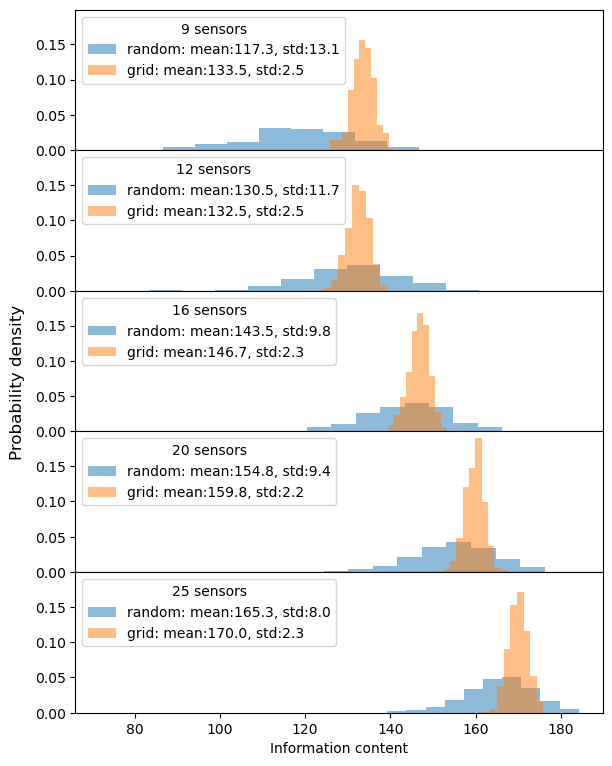

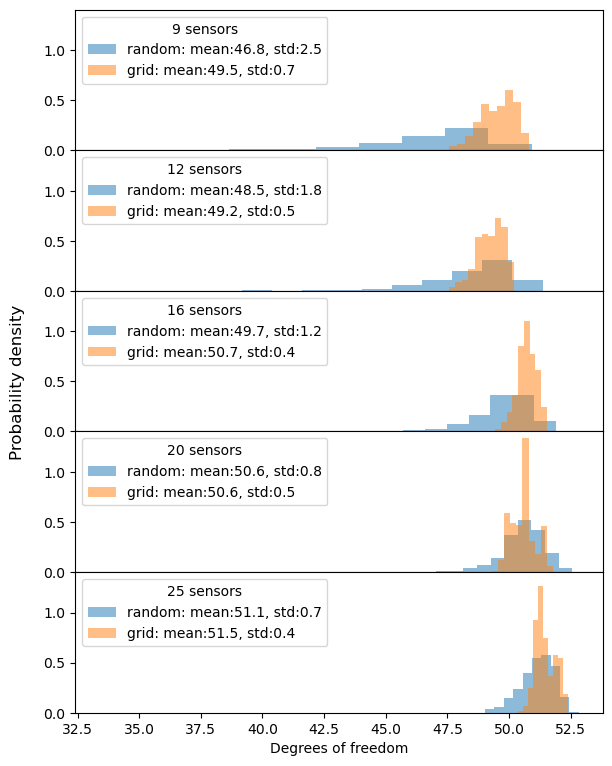

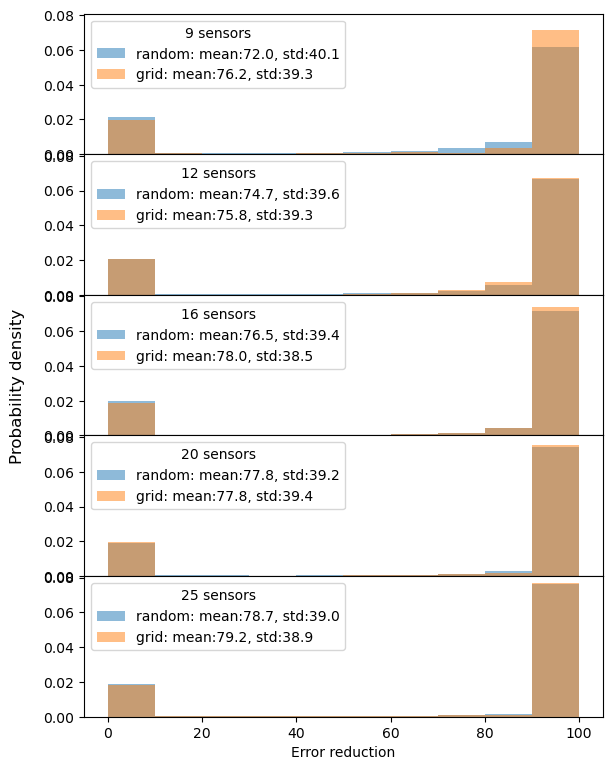

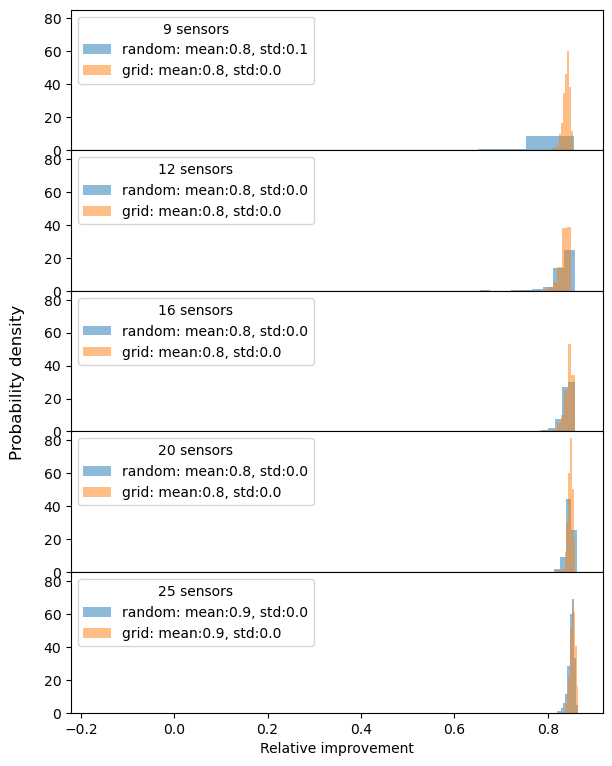

In [8]:
with plot_env(
    name="hist_information",
    notes=exp.config,
):
    plt_exp.plot_hist(
        env=plot_env,
        data_dict=exp.data["information_dict"],
        best_data_dict=exp.data["best_information_dict"],
        xlabel="Information content",
    )

with plot_env(
    name="hist_dof",
    notes=exp.config,
):
    plt_exp.plot_hist(
        env=plot_env,
        data_dict=exp.data["dof_dict"],
        best_data_dict=exp.data["best_dof_dict"],
        xlabel="Degrees of freedom",
    )

with plot_env(
    name="hist_error_reduction",
    notes=exp.config,
):
    plt_exp.plot_hist(
        env=plot_env,
        data_dict=exp.data["error_reduction_dict"],
        best_data_dict=exp.data["best_error_reduction_dict"],
        xlabel="Error reduction",
    )

with plot_env(
    name="hist_relative_improvement",
    notes=exp.config,
):
    plt_exp.plot_hist(
        env=plot_env,
        data_dict=exp.data["relative_gain_dict"],
        best_data_dict=exp.data["best_relative_gain_dict"],
        xlabel="Relative improvement",
    )


## Analyse best positions

Steps
1. Identify the indices of the 10% MC runs
2. Identify the measurement positions of these runs
3. Plot the positions

In [9]:
# 1. Best MC runs
n_best = 10
n_sample = 9
mc_index = np.arange(len(exp.data["information_dict"][n_sample]))
# Sort by most information content
mc_index = mc_index[np.array(exp.data["information_dict"][n_sample]).argsort()][
    -n_best:
]


In [10]:
# 2. Positions of the measurement stations
sensor_ids_array = np.array(exp.data["sensor_ids_dict"][n_sample])[mc_index]

sensor_index = exp.sensors.get_index()
x_positions = sensor_index[0][sensor_ids_array].flatten()
y_positions = sensor_index[1][sensor_ids_array].flatten()

total_positions, total_counts = np.unique(
    [x_positions, y_positions], axis=1, return_counts=True
)


In [11]:
# Convert positions to GRAL grid
total_positions[0] = total_positions[0] * GRAL.dx + GRAL.xmin
total_positions[1] = total_positions[1] * GRAL.dy + GRAL.ymin


In [12]:
# Load some background data
file_path = Path("/mnt/data/users/rmaiwald/GRAMM-GRAL/emissions/pickle_jar")

with open(file_path / "tno_gdf.pkl", "rb") as file:
    tno_gdf = pickle.load(file)

with open(file_path / "tno_df.pkl", "rb") as file:
    tno_df = pickle.load(file)

with open(file_path / "tno_point_gdf.pkl", "rb") as file:
    tno_point_gdf = pickle.load(file)


In [13]:
exp.data["tno_gdf"] = tno_gdf
exp.data["tno_df"] = tno_df

exp.data["total_counts"] = total_counts
exp.data["total_positions"] = total_positions


In [14]:
mindex = pd.MultiIndex.from_product([tno_df.columns.levels[0], ["co2_bf", "co2_ff"]])


[Errno 17] File exists: '/home/rmaiwald/results/plotting/sensor_placement/sensor_position/config_log.yml'


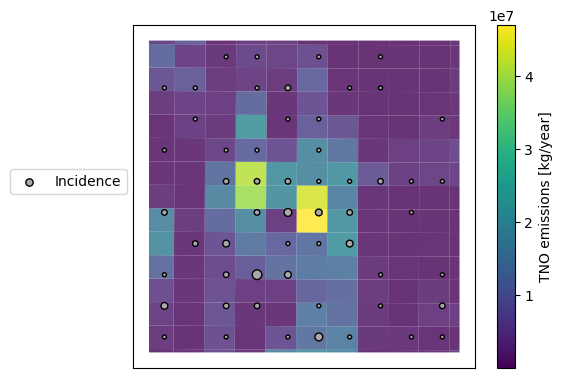

In [15]:
with plot_env(
    name="sensor_position",
    notes=exp.config,
):
    plt_exp.plot_sensor_counts(env=plot_env, exp=exp)


[Errno 17] File exists: '/home/rmaiwald/results/plotting/sensor_placement/sensor_position_osm/config_log.yml'


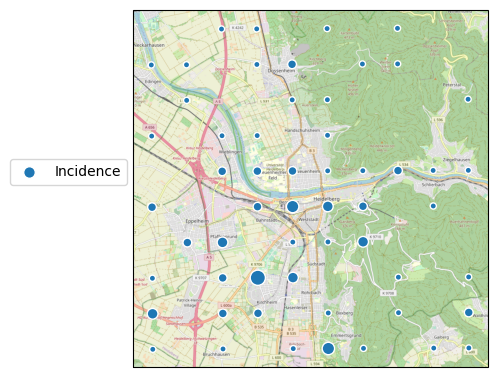

In [16]:
with plot_env(
    name="sensor_position_osm",
    notes=exp.config,
):
    plt_exp.plot_sensor_counts_osm(env=plot_env, exp=exp)
